In [1]:
import pandas as pd 
import geopandas as gpd 
import nltk
nltk.download('punkt')
#!pip install geoplot
#!pip install contextily
import contextily as ctx
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import folium
import numpy as np

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [2]:
df_schools = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/8f040d23-a09f-4dee-aa19-0892602490d8", sep = ';')

In [3]:
df_schools = df_schools[(df_schools["reg_id"] != "R00") &
                       (df_schools["reg_id"] != "R01") &
                       (df_schools["reg_id"] != "R02")  &
                       (df_schools["reg_id"] != "R03") &
                       (df_schools["reg_id"] != "R04") &
                       (df_schools["reg_id"] != "R05") &
                       (df_schools["reg_id"] != "R06")
                       &
                       (df_schools["reg_id"] != "R99")]

In [4]:
df_schools = df_schools.dropna(subset=['coordonnees'])

In [5]:
df_schools = df_schools.reset_index()
df_schools = df_schools[["uo_lib","type_d_etablissement","coordonnees","inscrits_2017"]]

In [6]:
"""
On récupère les donnés géographiques stockées dans la colonne geocalisation 
qui présente d'abord la latitude puis la longitude. 
"""

Longitude = []
Latitude = []
for j in range(0,df_schools.shape[0]):
    geocalisation = df_schools["coordonnees"][j]
    geocalisation = geocalisation.replace(',', ' ')
    word =  nltk.word_tokenize(geocalisation, language='french')
    Latitude.append(float(word[0]))
    Longitude.append(float(word[1]))
df_schools['Longitude'] = Longitude
df_schools['Latitude'] = Latitude

In [7]:
df_schools.drop(['coordonnees'], axis = 1, inplace = True)
df_schools.columns = ['Name','type','student_number', 'Longitude', 'Latitude']


In [8]:
df_schools

,Name,type,student_number,Longitude,Latitude
0,École centrale d'électronique,École,NaN,2.286830,48.851520
1,École d'ingénieurs de Purpan,École,986,1.400296,43.601838
2,École nationale supérieure d'architecture de P...,École,NaN,2.381920,48.893250
3,École nationale supérieure de création industr...,École,NaN,2.369340,48.858400
4,École nationale supérieure d'informatique pour...,École,565,2.432020,48.626200
...,...,...,...,...,...
239,École supérieure d'électronique de l'Ouest,École,1 213,-0.550804,47.493396
240,Institut national d'enseignement supérieur pou...,Grand établissement,NaN,2.282150,48.862750
241,Institut supérieur d’agriculture Rhône-Alpes,École,937,4.836377,45.727895
242,Université de Lorraine,Grand établissement,58 925,6.176340,48.696200


In [9]:
df_crous = pd.read_csv("df_with_rent_and_surface.csv", sep = ',')

In [10]:
df_crous["regions"].unique()

array(['Île-de-France', 'Occitanie', 'Bourgogne-Franche-Comté',
       'Grand Est', 'Normandie', 'La Réunion',
       "Provence-Alpes-Côte d'Azur", 'Hauts-de-France',
       'Auvergne-Rhône-Alpes', 'Nouvelle-Aquitaine', 'Bretagne',
       'Pays de la Loire', 'Centre-Val de Loire', 'Corse', 'Guadeloupe',
       'Martinique', 'Guyane'], dtype=object)

In [11]:
df_crous = df_crous[ (df_crous["regions"] != "La Réunion") &
                    (df_crous["regions"] != "Guadeloupe") &
                    (df_crous["regions"] != "Martinique") &
                    (df_crous["regions"] != "Guyane")]

In [12]:
df_crous['type'] = ["Résidence" for i in range(0,df_crous.shape[0])]
df_crous['student_number'] = [np.NaN for i in range(0,df_crous.shape[0])]

In [13]:
df_crous

,id,title,short_desc,zone,infos,services,contact,address,mail,phone,...,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,Max Surface,Min Surface,Mean Surface,type,student_number
0,205,Résidence Vauban,Guyancourt,YVELINES,Description La résidence est située au cœur de...,Laverie \r\n Salles de travail \r\n Salles d...,Résidence Vauban\r\n 1 boulevard d’Alembert782...,1 boulevard d’Alembert 78280 Guyancourt,residence.vauban@crous-versailles.fr,01 80 73 04 00,...,"[333.0, 537.0]",537.00,333.00,435.000000,[],NaN,NaN,NaN,Résidence,NaN
1,207,Résidence Le Square de l'Echiquier,Cergy-Pontoise,VAL D'OISE,DescriptionRésidence universitaire nouvellemen...,Wifi \r\n Laverie \r\n salle de sport \r\n ...,Résidence Le Square de l'échiquier\n9 square d...,9 square de l'échiquier 95800 Cergy-Pontoise,residence.lacroix@crous-versailles.fr,01 30 30 38 53,...,[334.0],334.00,334.00,334.000000,[],NaN,NaN,NaN,Résidence,NaN
2,214,Résidence Les Bas Longchamps,Bagneux,HAUTS DE SEINE,Description Résidence universitaire située à p...,Laverie \r\n Salles de travail et de détent...,Résidence de Bagneux /Les Bas de Longchamps\r\...,2 rue Abraham Lincoln 92220 Bagneux,residence.bagneux@crous-versailles.fr,01 86 63 00 90,...,"[332.0, 359.0]",359.00,332.00,345.500000,[28.0],28.0,28.0,28.000000,Résidence,NaN
3,225,Résidence de l’Ile,Bures-sur-Yvette,ESSONNE,Description Résidence universitaire située à p...,"Salles de détente, une avec télévision \r\n ...",Résidence de l’Ile\n14 rue du Docteur Collé - ...,14 rue du Docteur Collé - bâtiment 227 du camp...,residence.ile@crous-versailles.fr,01 69 07 68 96,...,[362.0],362.00,362.00,362.000000,[18.0],18.0,18.0,18.000000,Résidence,NaN
4,228,Résidence La Pacaterie,Orsay,ESSONNE,Description Résidence universitaire longée par...,"Salles de détente (télévision, ate...",Résidence La Pacaterie\nBâtiment 499 - rue de ...,Bâtiment 499 - rue de la Pacaterie 91400 Orsay,residence.pacaterie@crous-versailles.fr,01 69 15 75 98,...,[154.0],154.00,154.00,154.000000,[],NaN,NaN,NaN,Résidence,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,349,Cité Grémillon (secteur d'Hérouville-Saint-Clair),NaN,Herouville Saint Clair,BP 54 - Avenue de la Grande Cavée 14202 Hérouv...,Gratuits (Sauf € = Payants),Cité Grémillon (Secteur d'Hérouville-Saint-Cla...,BP 54 - Avenue de la Grande Cavée 14202 Hérouv...,herouville@crous-normandie.fr,02 31 47 61 23,...,"[249.85, 312.9, 388.6, 467.4, 525.0, 556.14]",556.14,249.85,416.648333,"[9.0, 18.0, 30.0, 49.0, 65.0, 69.0]",69.0,9.0,40.000000,Résidence,NaN
784,331,Résidence Antide Janvier,"Centre ville, sur les quais",Besançon - Centre ville,"Localisation :\r\n Au centre ville, à proximit...",Wifi Inclus dans le loyerPoint restoParking,Résidence Antide Janvier \r\n 49 T1 et de 27 T...,6 rue Antide Janvier 25000 Besançon,pole-hebergement-besancon@crous-besancon.fr,03 81 48 47 50,...,"[347.0, 502.0, 523.0]",523.00,347.00,457.333333,"[19.0, 35.3]",35.3,19.0,27.150000,Résidence,NaN
785,335,Résidence Jean Paul Sartre,Centre ville,Belfort,Localisation :\r\n La résidence Sartre est sit...,LaverieParking fermé (15€/mois),"Résidence Jean-Paul Sartre \r\n 130 T1, 11 T1 ...",Rue Gaston Deferre 90000 Belfort,pole-hebergement-nfc@crous-bfc.fr,03.84.21.95.37 - 06.48.41.76.36,...,"[280.0, 311.0, 361.0, 405.0, 416.0, 466.0, 586.0]",586.00,280.00,403.571429,"[18.0, 36.0, 51.5]",51.5,18.0,35.166667,Résidence,NaN
786,416,Maret,Logements proposés : chambres traditionnelles,DIJON CENTRE,NaN,"La Résidence universitaire Maret, située en pl...",Résidence MARET \r\n 3 rue du Docteur Maret \r...,3 rue du Docteur Maret 21000 Dijon,NaN,03.45.34.84.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Résidence,NaN


In [14]:
df_crous = df_crous[["title","type","geocalisation","student_number"]]

In [15]:
df_crous = df_crous.reset_index(drop = True)

In [16]:
"""
On récupère les donnés géographiques stockées dans la colonne geocalisation 
qui présente d'abord la latitude puis la longitude. 
"""

Longitude = []
Latitude = []
for j in range(0,df_crous.shape[0]):
    geocalisation = df_crous["geocalisation"][j]
    geocalisation = geocalisation.replace(',', ' ')
    word =  nltk.word_tokenize(geocalisation, language='french')
    Latitude.append(float(word[0]))
    Longitude.append(float(word[1]))
df_crous['Longitude'] = Longitude
df_crous['Latitude'] = Latitude

In [17]:
df_crous.drop(['geocalisation'], axis = 1, inplace = True)

In [18]:
df_crous

,title,type,student_number,Longitude,Latitude
0,Résidence Vauban,Résidence,NaN,2.044151,48.779652
1,Résidence Le Square de l'Echiquier,Résidence,NaN,2.026887,49.048298
2,Résidence Les Bas Longchamps,Résidence,NaN,2.316971,48.790691
3,Résidence de l’Ile,Résidence,NaN,2.157896,48.698803
4,Résidence La Pacaterie,Résidence,NaN,2.184678,48.701542
...,...,...,...,...,...
759,Cité Grémillon (secteur d'Hérouville-Saint-Clair),Résidence,NaN,-0.339214,49.203205
760,Résidence Antide Janvier,Résidence,NaN,6.015343,47.236507
761,Résidence Jean Paul Sartre,Résidence,NaN,6.853714,47.638988
762,Maret,Résidence,NaN,5.035332,47.322498


In [19]:
df_crous.columns = ['Name','type','student_number', 'Longitude', 'Latitude']


In [20]:
df_concated = pd.concat([df_crous,df_schools], ignore_index=True)
df_concated 

,Name,type,student_number,Longitude,Latitude
0,Résidence Vauban,Résidence,NaN,2.044151,48.779652
1,Résidence Le Square de l'Echiquier,Résidence,NaN,2.026887,49.048298
2,Résidence Les Bas Longchamps,Résidence,NaN,2.316971,48.790691
3,Résidence de l’Ile,Résidence,NaN,2.157896,48.698803
4,Résidence La Pacaterie,Résidence,NaN,2.184678,48.701542
...,...,...,...,...,...
1003,École supérieure d'électronique de l'Ouest,École,1 213,-0.550804,47.493396
1004,Institut national d'enseignement supérieur pou...,Grand établissement,NaN,2.282150,48.862750
1005,Institut supérieur d’agriculture Rhône-Alpes,École,937,4.836377,45.727895
1006,Université de Lorraine,Grand établissement,58 925,6.176340,48.696200


In [21]:
"""
On transforme notre dataframe pandas en geopandas avec pour geometry la latitude et 
la longitude.
"""
gdf = gpd.GeoDataFrame(
    df_concated, geometry=gpd.points_from_xy(df_concated.Longitude, df_concated.Latitude))

gdf

,Name,type,student_number,Longitude,Latitude,geometry
0,Résidence Vauban,Résidence,NaN,2.044151,48.779652,POINT (2.04415 48.77965)
1,Résidence Le Square de l'Echiquier,Résidence,NaN,2.026887,49.048298,POINT (2.02689 49.04830)
2,Résidence Les Bas Longchamps,Résidence,NaN,2.316971,48.790691,POINT (2.31697 48.79069)
3,Résidence de l’Ile,Résidence,NaN,2.157896,48.698803,POINT (2.15790 48.69880)
4,Résidence La Pacaterie,Résidence,NaN,2.184678,48.701542,POINT (2.18468 48.70154)
...,...,...,...,...,...,...
1003,École supérieure d'électronique de l'Ouest,École,1 213,-0.550804,47.493396,POINT (-0.55080 47.49340)
1004,Institut national d'enseignement supérieur pou...,Grand établissement,NaN,2.282150,48.862750,POINT (2.28215 48.86275)
1005,Institut supérieur d’agriculture Rhône-Alpes,École,937,4.836377,45.727895,POINT (4.83638 45.72789)
1006,Université de Lorraine,Grand établissement,58 925,6.176340,48.696200,POINT (6.17634 48.69620)


In [22]:
"""
On récupère un fond de carte de la France.
"""
France = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")

<AxesSubplot: >

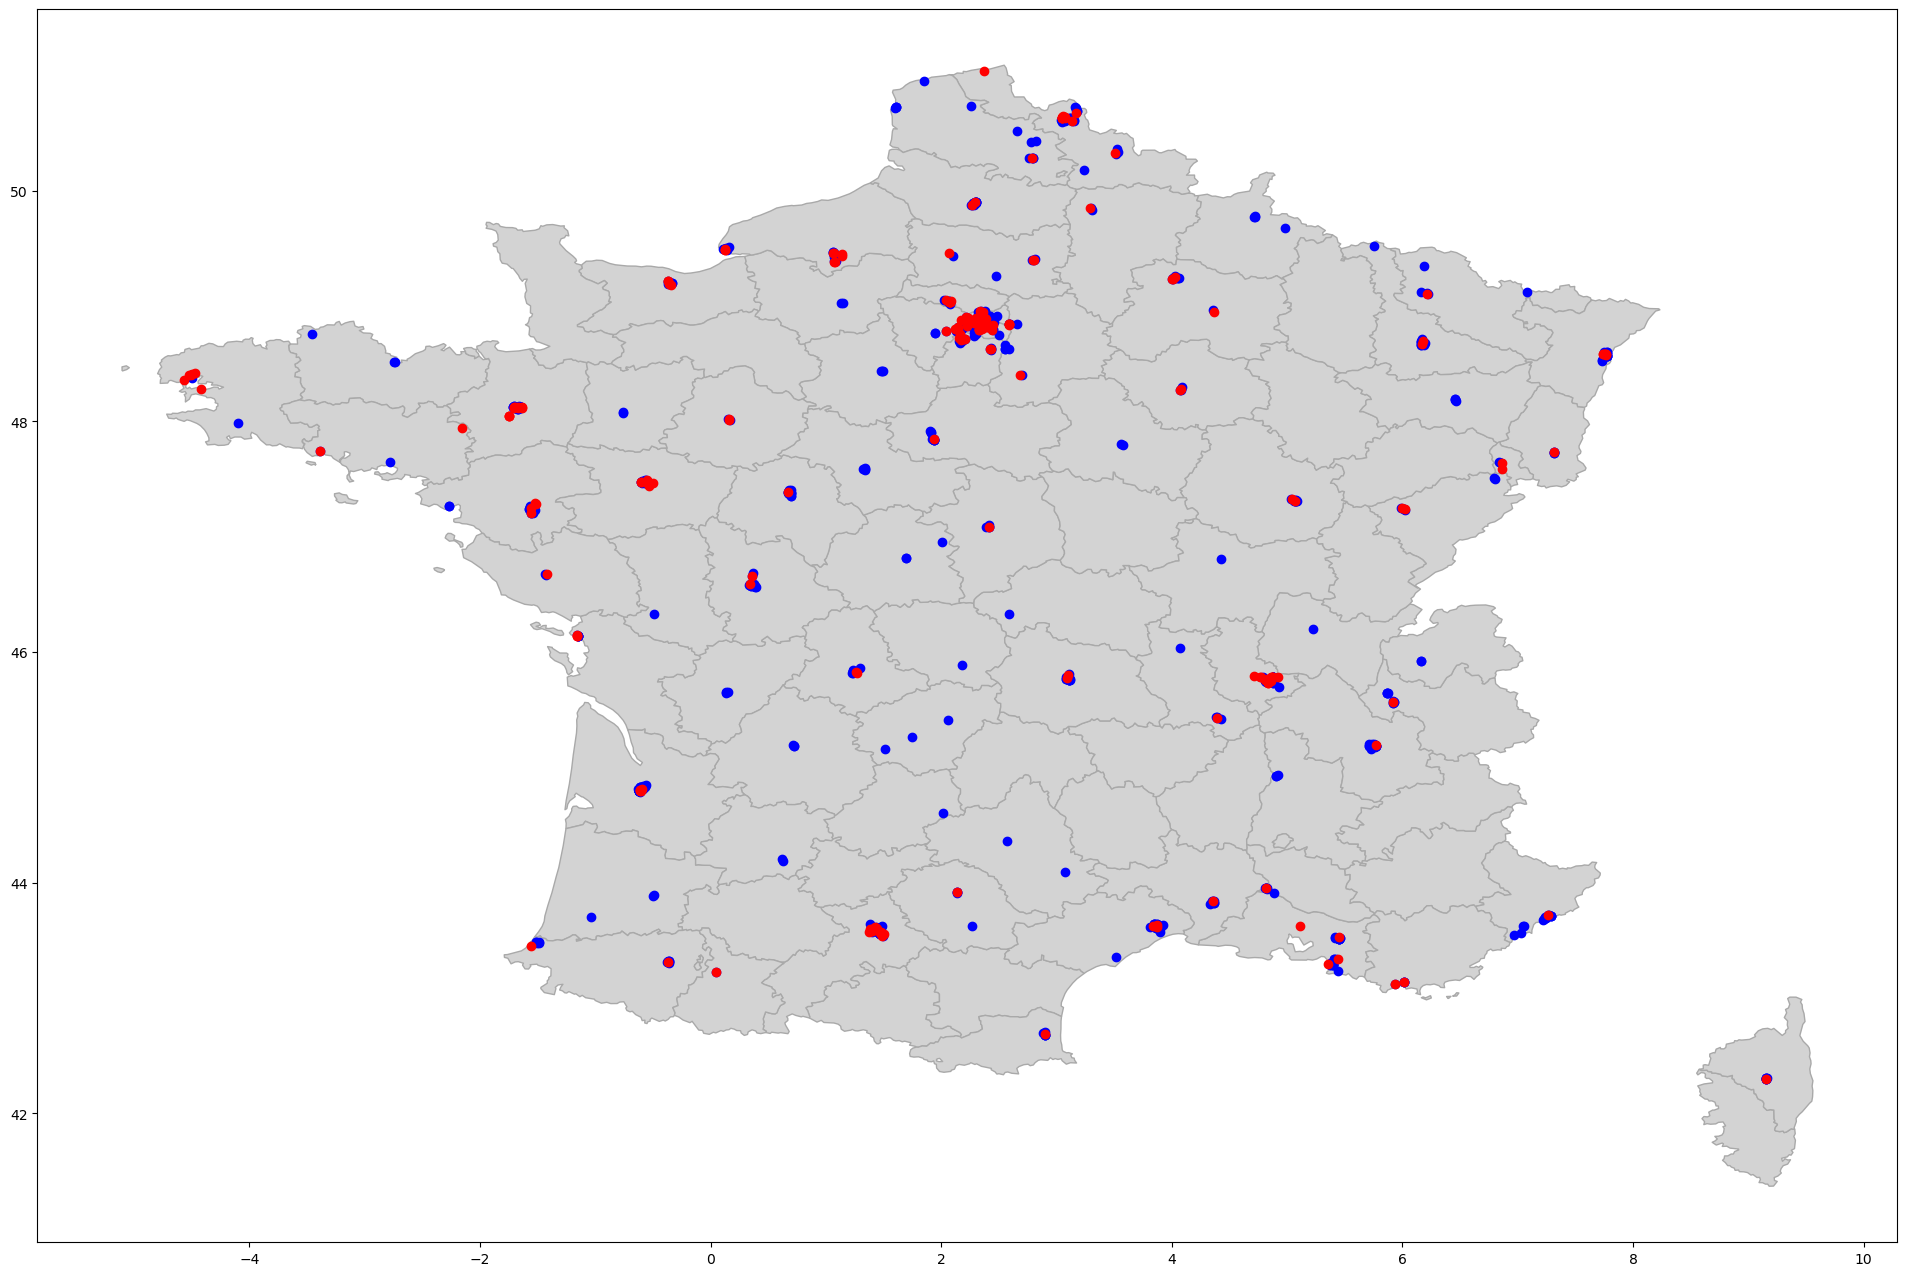

In [42]:
fig, ax = plt.subplots(figsize=(24, 18))

France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')
gdf[gdf["type"] =="Résidence"].plot(ax = ax, color='blue')
gdf[gdf["type"] !="Résidence"].plot(ax = ax, color='red')


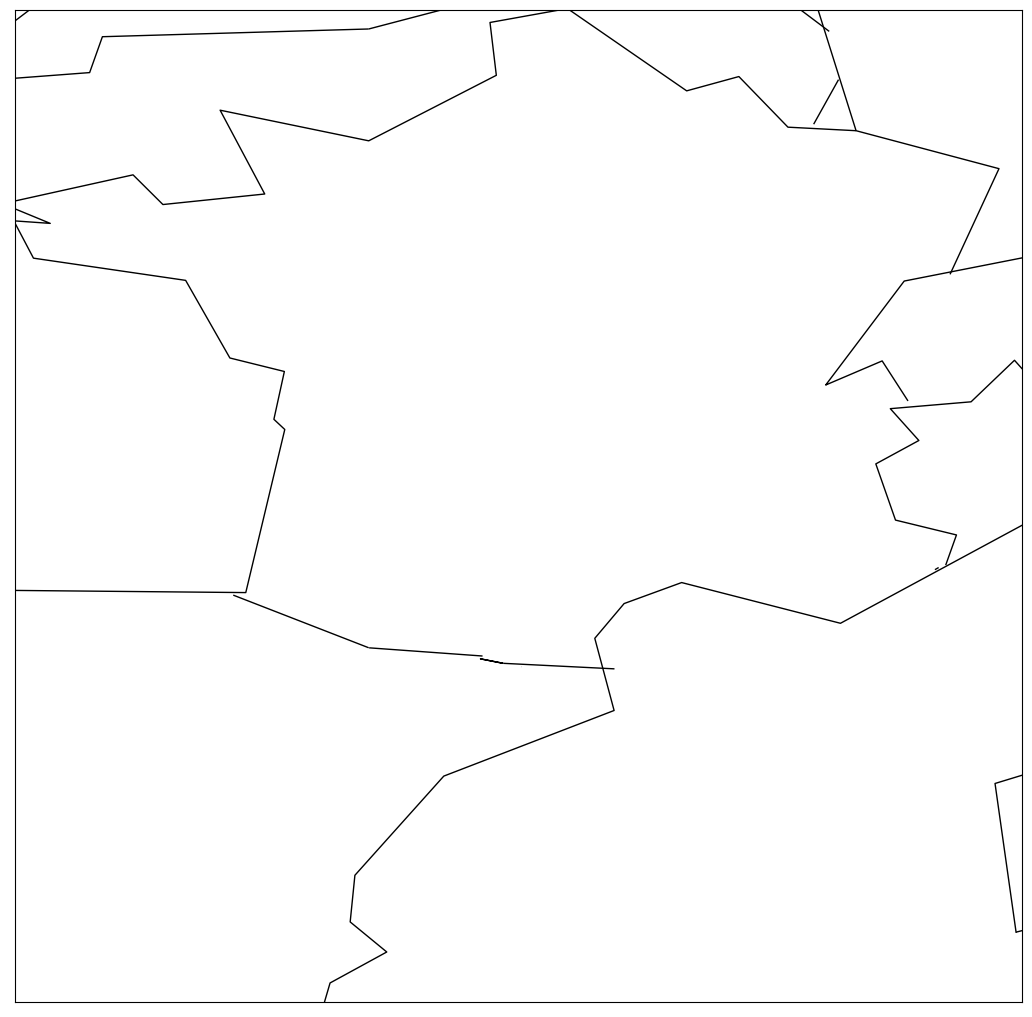

In [36]:
"""
Test 
"""

#!pip install basemap
#!pip install mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=13,13

# Always start witht the basemap function to initialize a map
m=Basemap(llcrnrlon=  -4.619559, llcrnrlat=38.083752 ,urcrnrlon= 8.533025,urcrnrlat=  51.037438)
 
# Show the coast lines
m.drawcountries(linewidth=1.0, linestyle='solid', color='k')
m.drawcoastlines()
 
plt.show();